In [3]:
# import useful libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Data Overview


In [4]:
import pandas as pd
path = 'loan.csv'
df=pd.read_csv(path)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
#  I focus into 2 scenarios: Fully paid and Charged-off
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# Data cleaning

## Drop data

### Drop Current Rows in loan_status columns
>  I forcus in 2 main scenarios: CHARGED OFF and FUllY PAID 

In [9]:
# drop Current Status
df =df[(df['loan_status']!='Current')]

### Drop null values

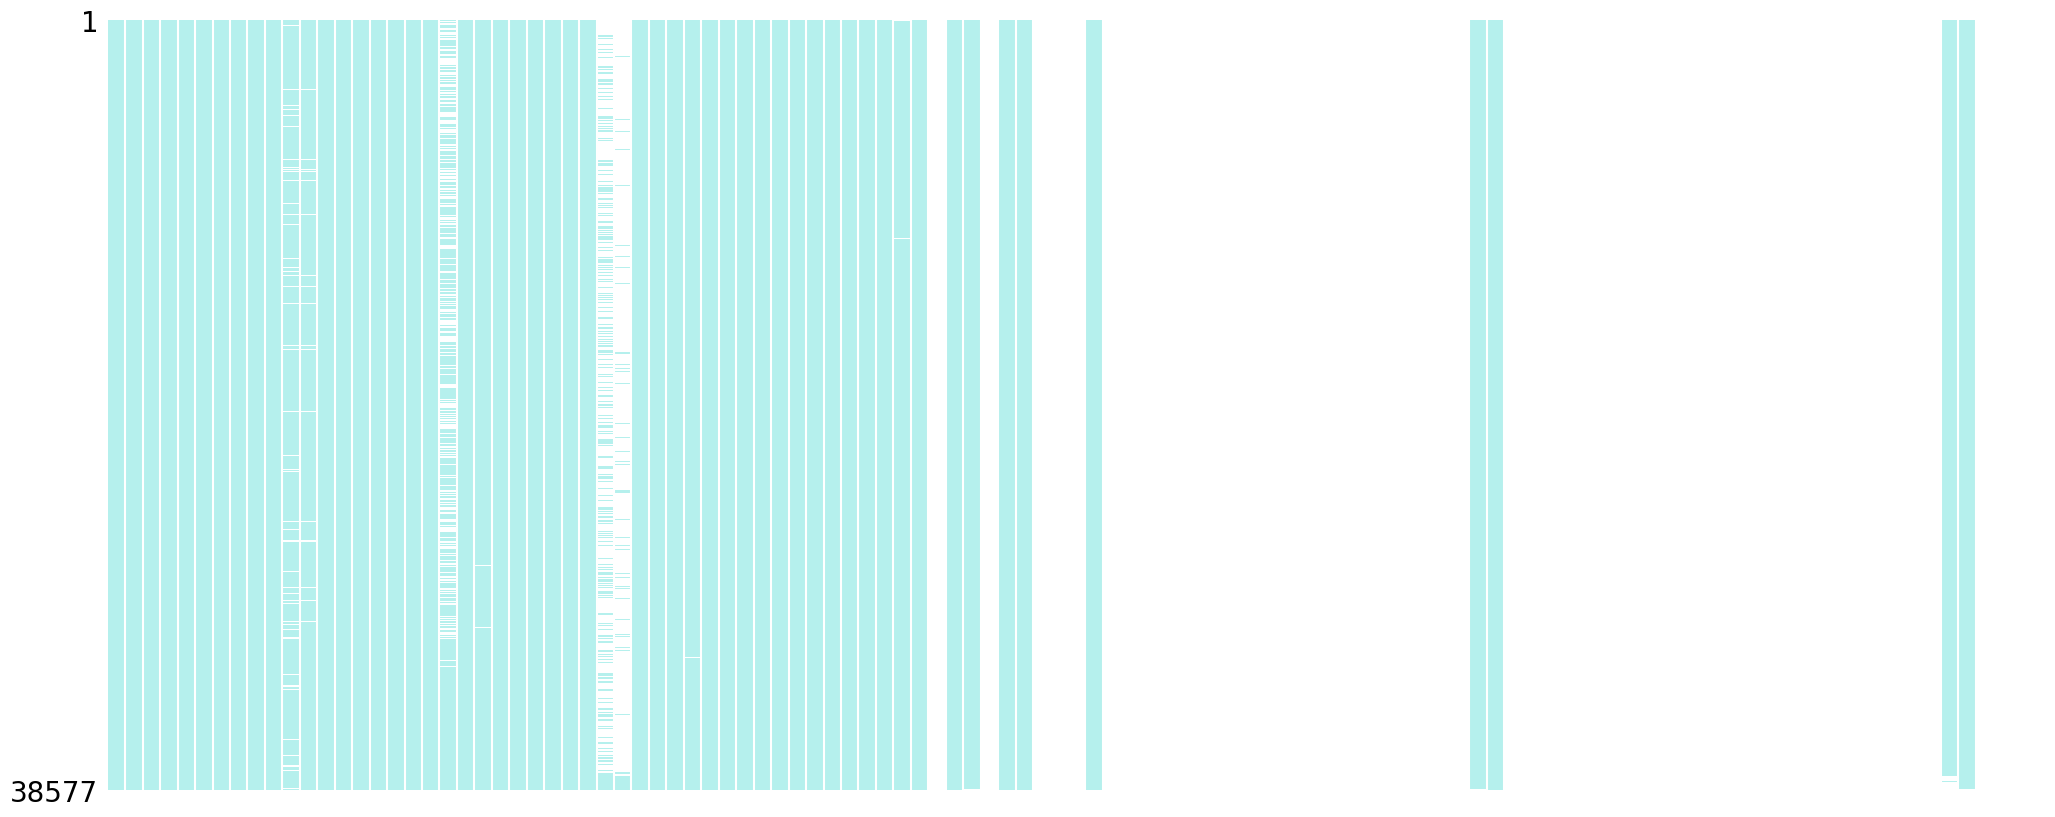

In [10]:
#overview missing data
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

In [11]:
# check null ratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')


number of columns with null values per total columns: 68/111


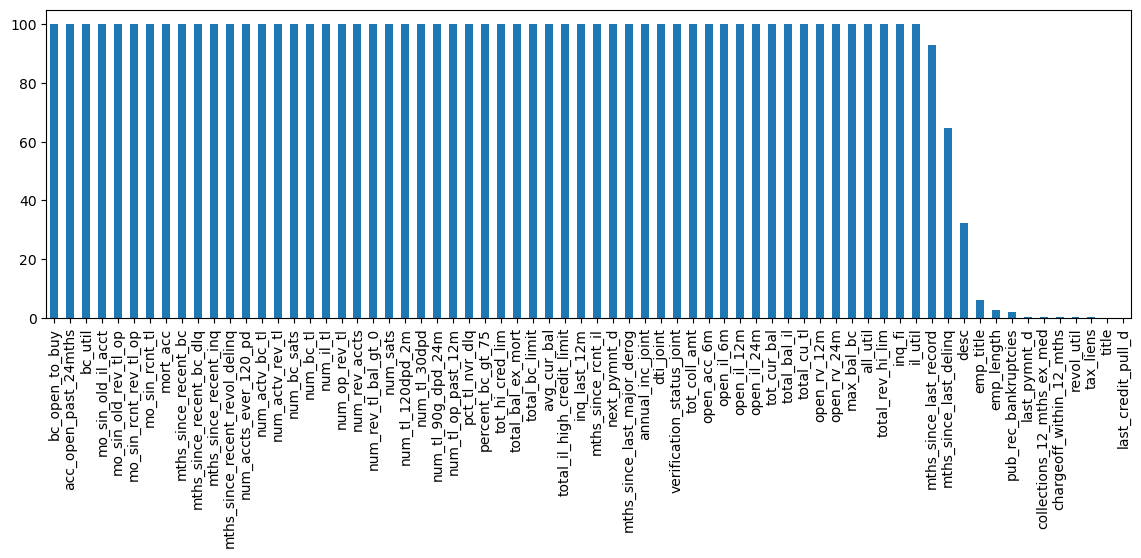

In [12]:
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [13]:
null_colummns_90 = r_null[r_null > 90].sort_values(ascending = False)
print('number of columns with 90% null values:',len(null_colummns))
null_colummns_90

number of columns with 90% null values: 68


mo_sin_old_rev_tl_op              100.000000
next_pymnt_d                      100.000000
mo_sin_rcnt_tl                    100.000000
mort_acc                          100.000000
mths_since_recent_bc              100.000000
mths_since_recent_bc_dlq          100.000000
mths_since_recent_inq             100.000000
mths_since_recent_revol_delinq    100.000000
num_accts_ever_120_pd             100.000000
num_actv_bc_tl                    100.000000
num_actv_rev_tl                   100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_il_tl                         100.000000
num_op_rev_tl                     100.000000
num_rev_accts                     100.000000
num_rev_tl_bal_gt_0               100.000000
num_sats                          100.000000
num_tl_120dpd_2m                  100.000000
num_tl_30dpd                      100.000000
num_tl_90g_dpd_24m                100.000000
num_tl_op_past_12m                100.000000
pct_tl_nvr

In [14]:
list(null_colummns_90.index)

['mo_sin_old_rev_tl_op',
 'next_pymnt_d',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'mo_sin_rcnt_rev_tl_op',
 'total_il_high_credit_limit',
 'mo_sin_old_il_acct',
 'total_bal_il',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'il_util',
 'bc_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',

In [15]:
df = df.drop(columns=list(null_colummns_90.index))
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### drop columns with only one values

In [16]:
columns  = list(df.columns)
columns_vales_count = {c : len(df[c].value_counts().index) for c in columns}
columns_vales_count

{'id': 38577,
 'member_id': 38577,
 'loan_amnt': 870,
 'funded_amnt': 1019,
 'funded_amnt_inv': 8050,
 'term': 2,
 'int_rate': 370,
 'installment': 15022,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 5215,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'pymnt_plan': 1,
 'url': 38577,
 'desc': 25803,
 'purpose': 14,
 'title': 19297,
 'zip_code': 822,
 'addr_state': 50,
 'dti': 2853,
 'delinq_2yrs': 11,
 'earliest_cr_line': 524,
 'inq_last_6mths': 9,
 'mths_since_last_delinq': 95,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21275,
 'revol_util': 1088,
 'total_acc': 82,
 'initial_list_status': 1,
 'out_prncp': 1,
 'out_prncp_inv': 1,
 'total_pymnt': 36714,
 'total_pymnt_inv': 36387,
 'total_rec_prncp': 6841,
 'total_rec_int': 34025,
 'total_rec_late_fee': 1320,
 'recoveries': 4040,
 'collection_recovery_fee': 2616,
 'last_pymnt_d': 101,
 'last_pymnt_amnt': 34418,
 'last_credit_pull_d': 106,
 'collections_12_m

In [17]:
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [18]:
df = df.drop(columns=one_value_column)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


### Drop unessecery columns:
1. id columns
2. columns with description meaning
3. columns which cannot be used for calculation
4. The columns have similar meanings

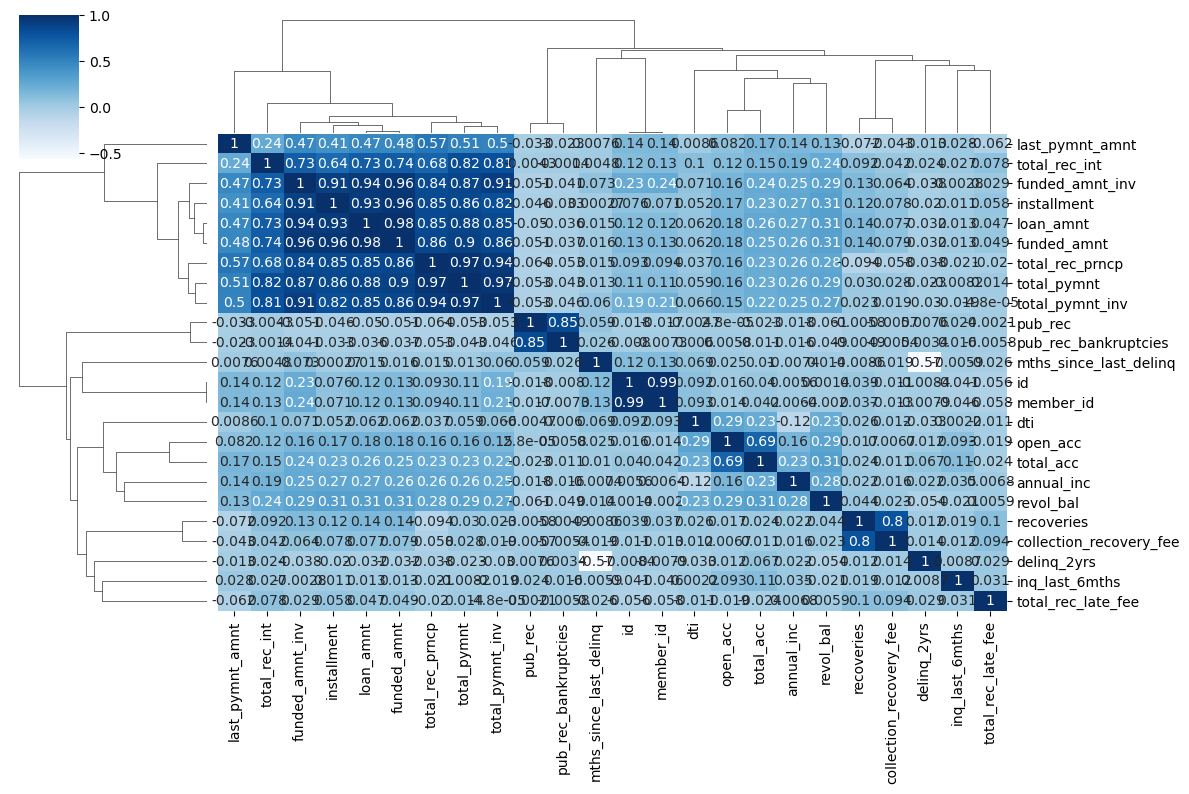

In [19]:
# base on Correlation Matrix to find similar-meaning-column-group
corr = df.corr()
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

In [20]:

unnessesary_columns = ['url','member_id','id','emp_title','funded_amnt_inv','desc', 'title','sub_grade',
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 
    'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_d', 
    'last_pymnt_amnt', 'last_credit_pull_d', 'addr_state' ]

In [21]:
df = df.drop(columns=unnessesary_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   term                    38577 non-null  object 
 3   int_rate                38577 non-null  object 
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   emp_length              37544 non-null  object 
 7   home_ownership          38577 non-null  object 
 8   annual_inc              38577 non-null  float64
 9   verification_status     38577 non-null  object 
 10  issue_d                 38577 non-null  object 
 11  loan_status             38577 non-null  object 
 12  purpose                 38577 non-null  object 
 13  zip_code                38577 non-null  object 
 14  dti                     38577 non-null

##  Transform columns

In [22]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [23]:
df['term'] = list(map(lambda x: int(x[:3]), df['term']))
df['term'].value_counts()


36    29096
60     9481
Name: term, dtype: int64

In [24]:
df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [25]:
df['int_rate'] = df['int_rate'].apply(lambda x : float(x[:-1]))
df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [26]:
list(df['revol_util'].value_counts().index)


['0%',
 '0.20%',
 '63%',
 '40.70%',
 '31.20%',
 '70.40%',
 '61%',
 '66.70%',
 '57.40%',
 '37.60%',
 '66.60%',
 '46.40%',
 '0.10%',
 '64.80%',
 '32%',
 '75.50%',
 '46.60%',
 '64.60%',
 '34.40%',
 '65.90%',
 '70.80%',
 '25.50%',
 '35.30%',
 '49.80%',
 '48.90%',
 '68.70%',
 '41%',
 '51.10%',
 '51.60%',
 '33.70%',
 '48%',
 '36.50%',
 '45.60%',
 '72.10%',
 '47.80%',
 '89.50%',
 '48.20%',
 '76.60%',
 '41.60%',
 '88%',
 '49.10%',
 '74.90%',
 '54.30%',
 '78.70%',
 '27.20%',
 '68.60%',
 '55.80%',
 '89.90%',
 '57.20%',
 '52.30%',
 '62.80%',
 '29.10%',
 '53.90%',
 '73.20%',
 '54.60%',
 '55.50%',
 '62%',
 '33.30%',
 '64.30%',
 '55.10%',
 '55.20%',
 '21.50%',
 '43.40%',
 '7.20%',
 '40.20%',
 '53.70%',
 '79.50%',
 '60.20%',
 '41.40%',
 '57.70%',
 '30.90%',
 '45.90%',
 '52.40%',
 '55.40%',
 '23%',
 '49.60%',
 '58.70%',
 '57.90%',
 '55.70%',
 '59.60%',
 '56.70%',
 '57.80%',
 '44.10%',
 '54%',
 '76%',
 '70.10%',
 '70.30%',
 '74.40%',
 '47.40%',
 '48.70%',
 '23.80%',
 '66.90%',
 '1%',
 '44.70%',
 '26.70

In [27]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)
df['revol_util'].value_counts()

0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [28]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [29]:
df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

df['emp_length'].value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [30]:
df['issue_d'].value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [31]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df= df.drop(columns='issue_d')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   term                    38577 non-null  int64  
 3   int_rate                38577 non-null  float64
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   emp_length              37544 non-null  float64
 7   home_ownership          38577 non-null  object 
 8   annual_inc              38577 non-null  float64
 9   verification_status     38577 non-null  object 
 10  loan_status             38577 non-null  object 
 11  purpose                 38577 non-null  object 
 12  zip_code                38577 non-null  object 
 13  dti                     38577 non-null  float64
 14  mths_since_last_delinq  13672 non-null

## fillna

number of columns with null values per total columns: 4/20


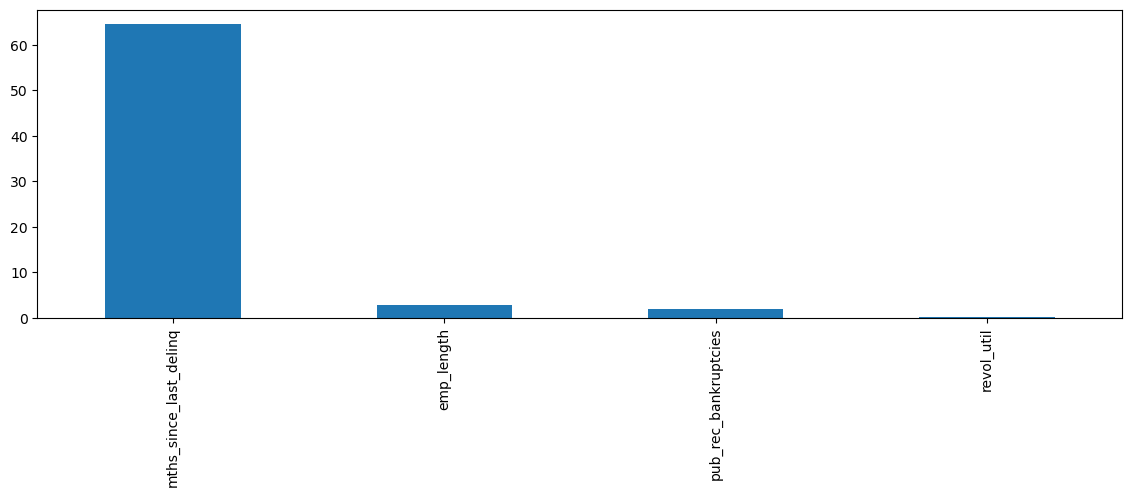

In [33]:
# check NAN columns again
# check nullratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()


In [34]:
null_colummns

mths_since_last_delinq    64.559193
emp_length                 2.677761
pub_rec_bankruptcies       1.806776
revol_util                 0.129611
dtype: float64

In [35]:
# pub_rec_bankruptcies and emp_length have less nan so I decide to drop rows
print('total row before dropping:', df.shape[0])
numrow_before = df.shape[0]
df = df.dropna(subset=['emp_length','pub_rec_bankruptcies','revol_util'])
print('total row after dropping:', df.shape[0])
print('num deleted row:', numrow_before - df.shape[0])

total row before dropping: 38577
total row after dropping: 36800
num deleted row: 1777


In [36]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

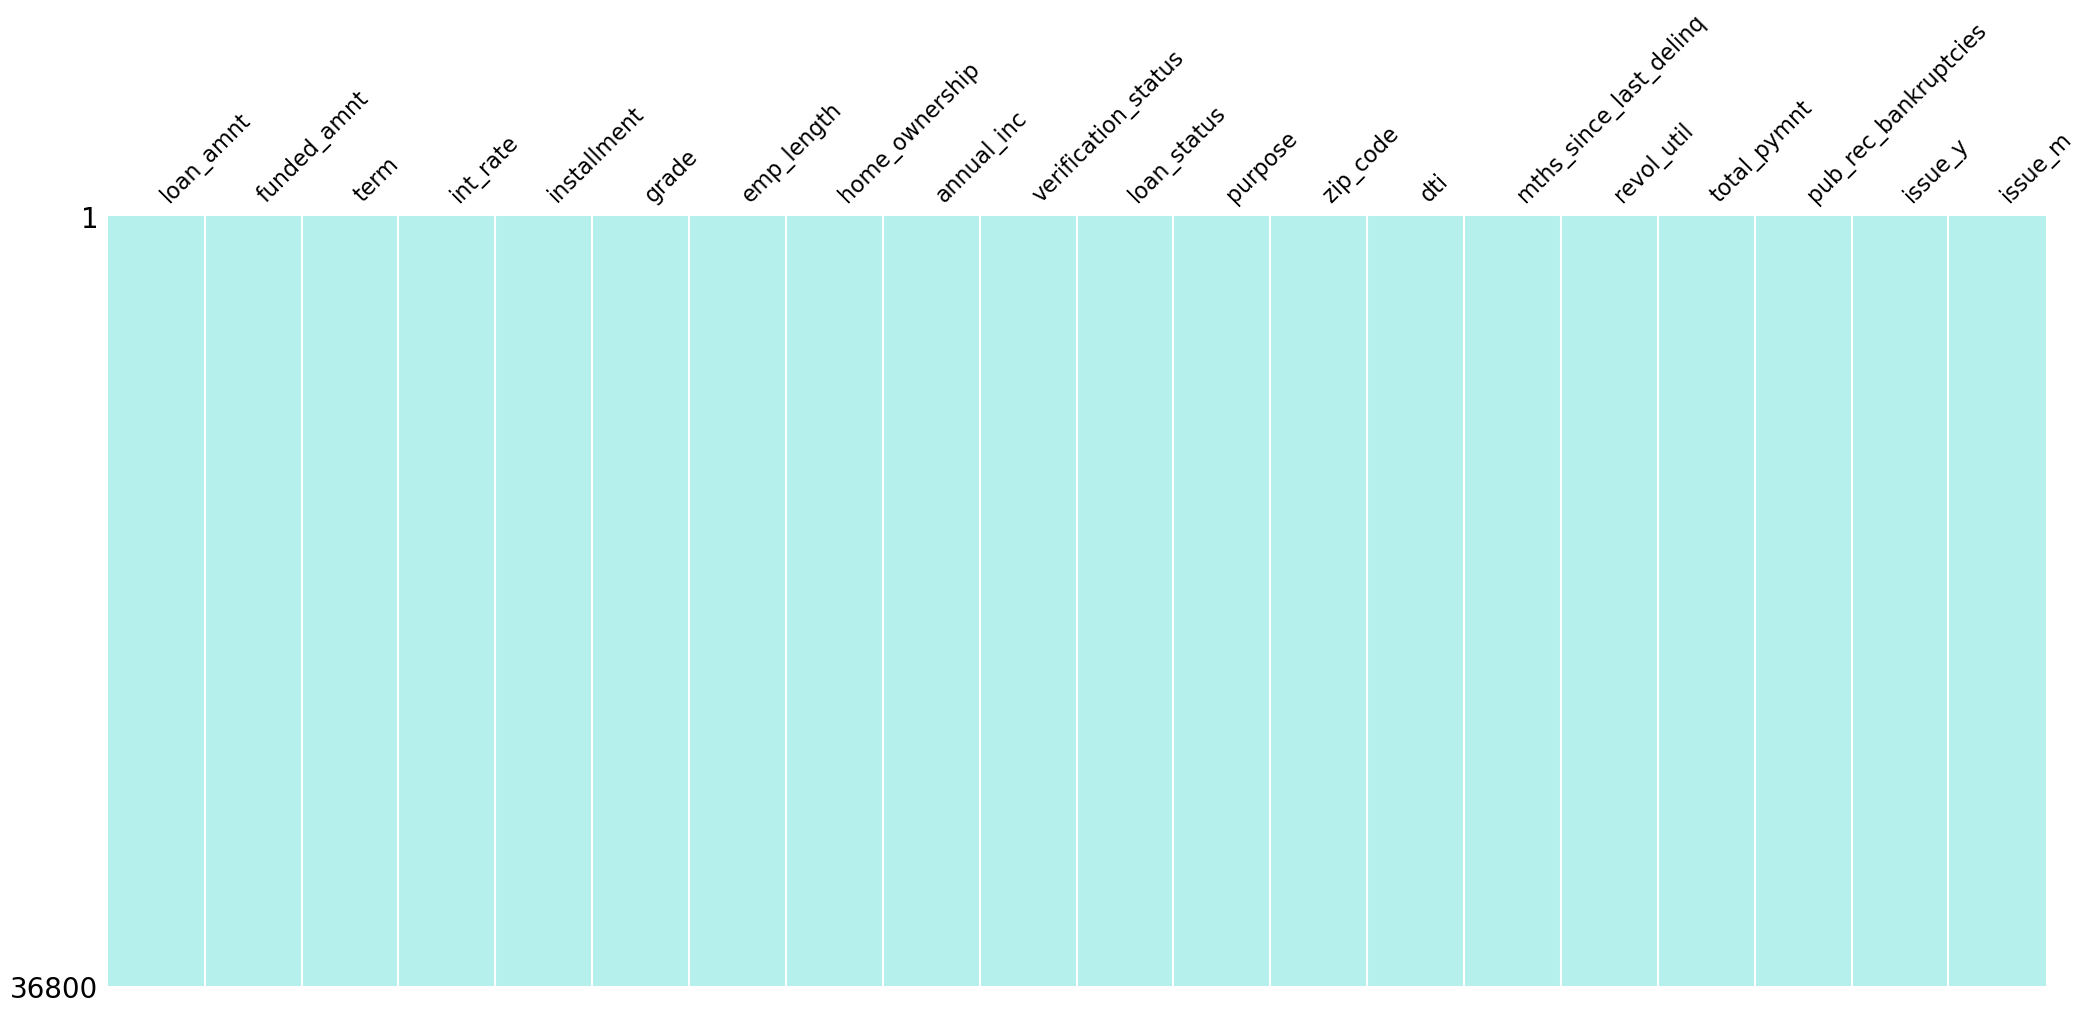

In [37]:
#check missing data again
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

# Univatiate Analysis

## analys to drop outlier

In [38]:
def univariate_analysis1(df, column):
    df1= df[df['loan_status']=='Fully Paid']
    df2 = df[df['loan_status']=='Charged Off']
    _, p = plt.subplots(2,2, figsize=(16, 4))
    sns.distplot(df1.loc[df1[column].notnull(), column], kde=True, hist=True, ax=p[0][0])
    sns.boxplot(x=column, data=df1, ax=p[0][1])
    sns.distplot(df2.loc[df2[column].notnull(), column], kde=True, hist=True, ax=p[1][0])
    sns.boxplot(x=column, data=df2, ax=p[1][1])
    p[0][0].set_xlabel(f'{column}_Fully Paid')
    p[0][1].set_xlabel(f'{column}_Fully Paid')
    p[1][0].set_xlabel(f'{column}_Charged Off')
    p[1][1].set_xlabel(f'{column}_Charged Off')
    plt.tight_layout()
    plt.show()

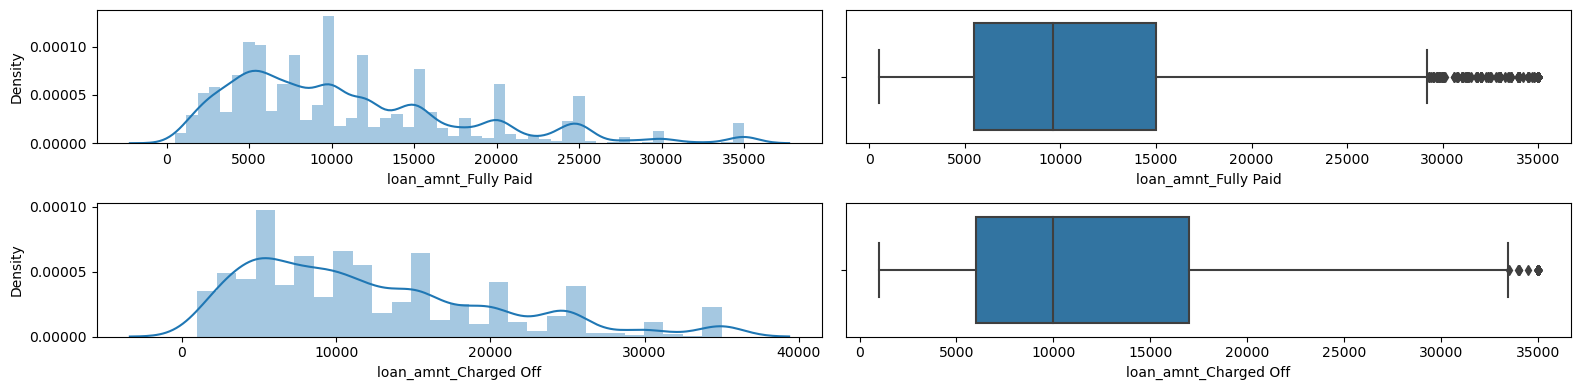

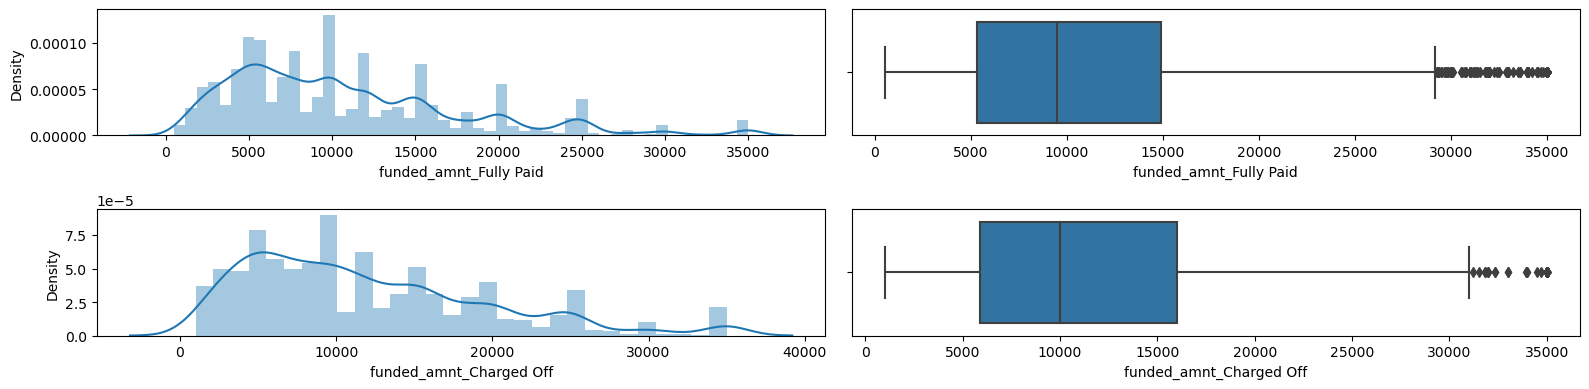

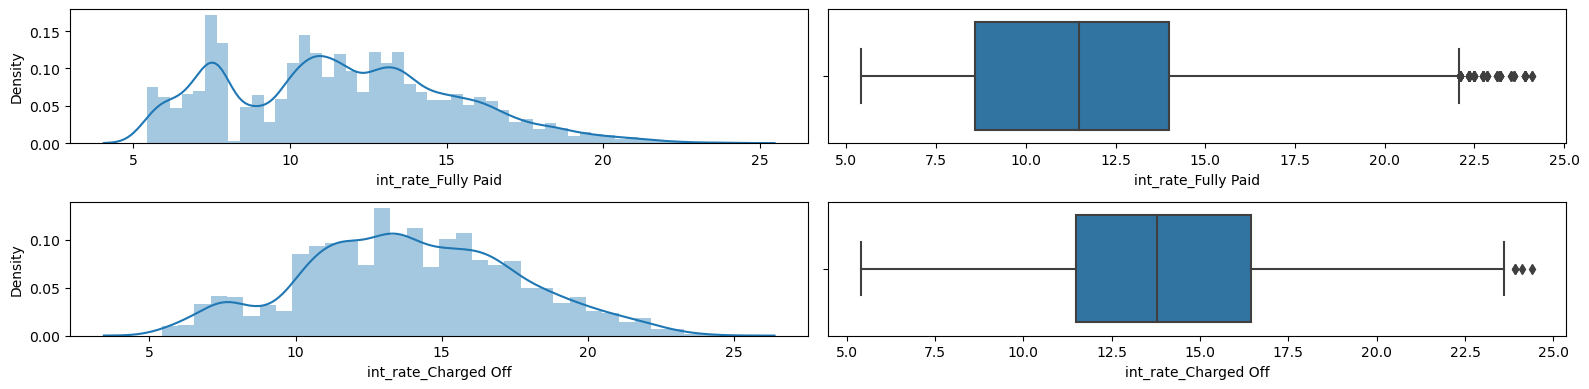

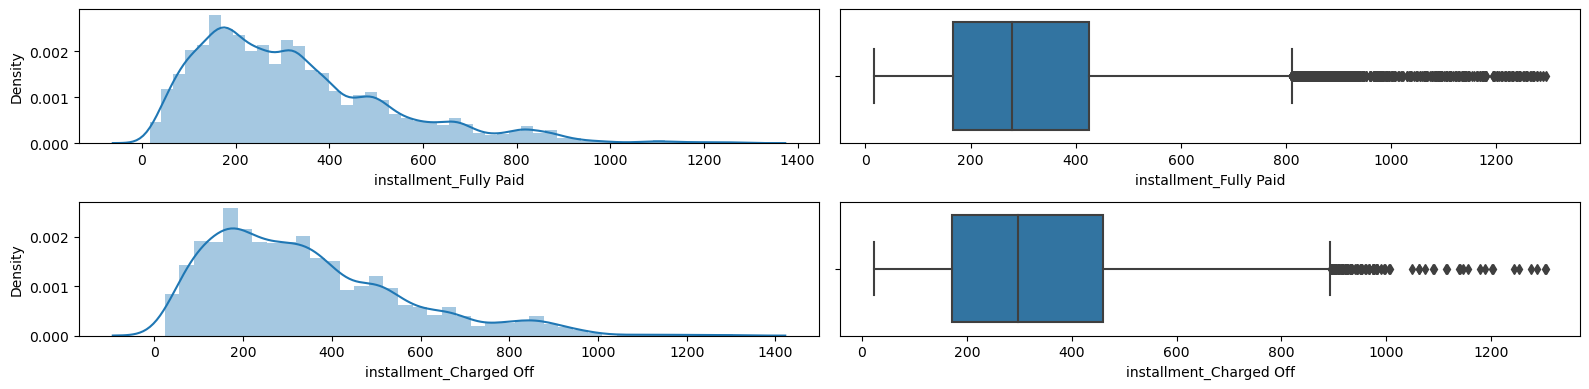

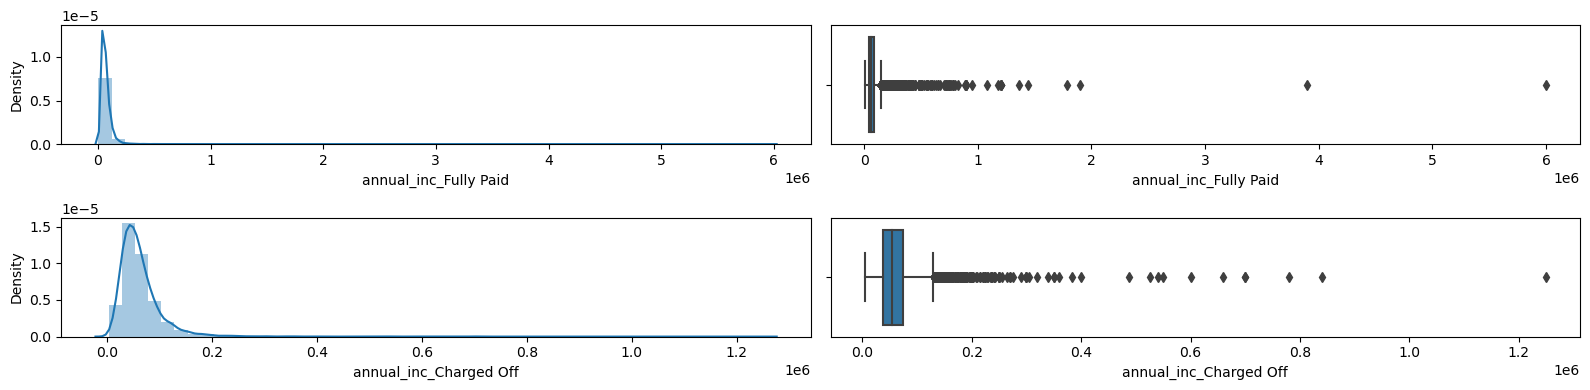

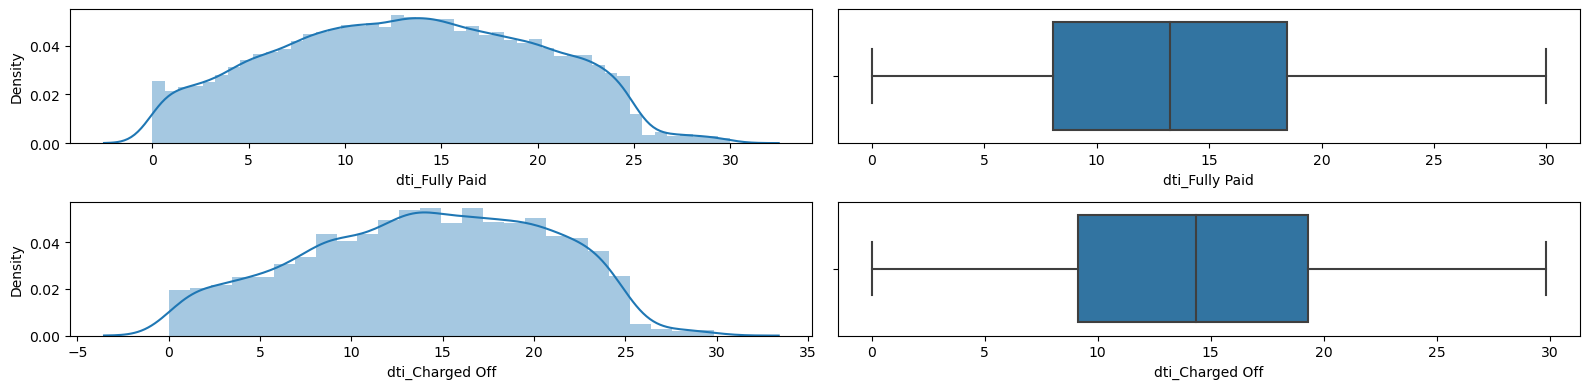

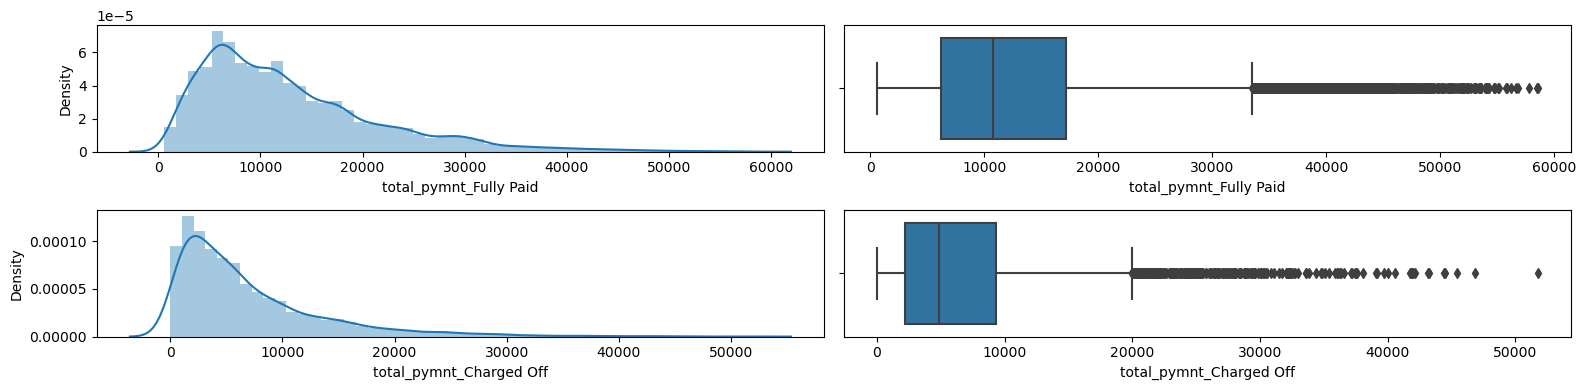

In [39]:
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment',
                        'annual_inc', 'dti','total_pymnt']
for c in ana_boxplot_columns:
    univariate_analysis1(df, c)

> I've noticed that there's a slight shift in the distribution between Fully Paid and Charged Off customers based on factors such as the interest rate on the loan (int_rate), annual income (annual_inc), and total payments received (total_pymnt)

In [40]:
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    print('Percentage of dropped row: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [41]:
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment', 'annual_inc', 'dti']
for c in ana_boxplot_columns:
    print(f'drop outlier for {c}')
    df= drop_outliner(df,c)

drop outlier for loan_amnt
Percentage of dropped row:  2.93 %
drop outlier for funded_amnt
Percentage of dropped row:  0.08 %
drop outlier for int_rate
Percentage of dropped row:  0.18 %
drop outlier for installment
Percentage of dropped row:  2.92 %
drop outlier for annual_inc
Percentage of dropped row:  4.33 %
drop outlier for dti
Percentage of dropped row:  0.0 %


## plot with value_count

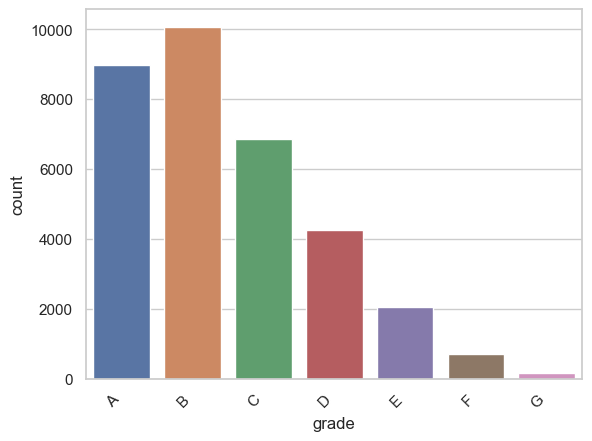

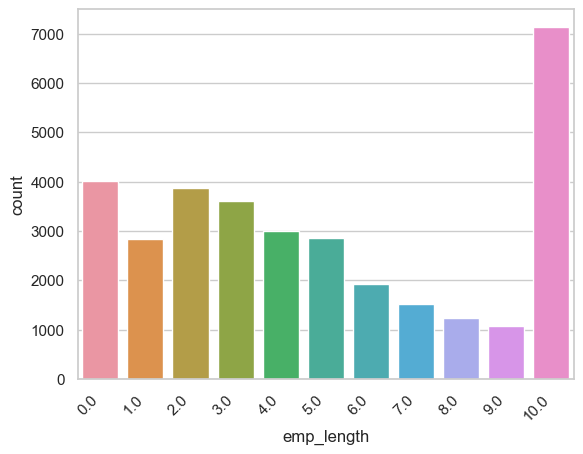

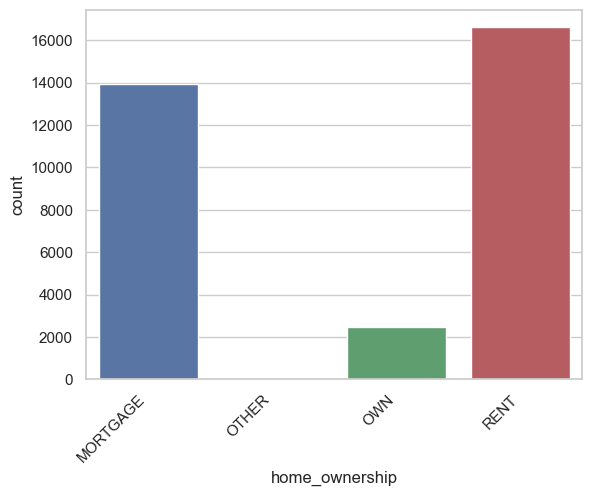

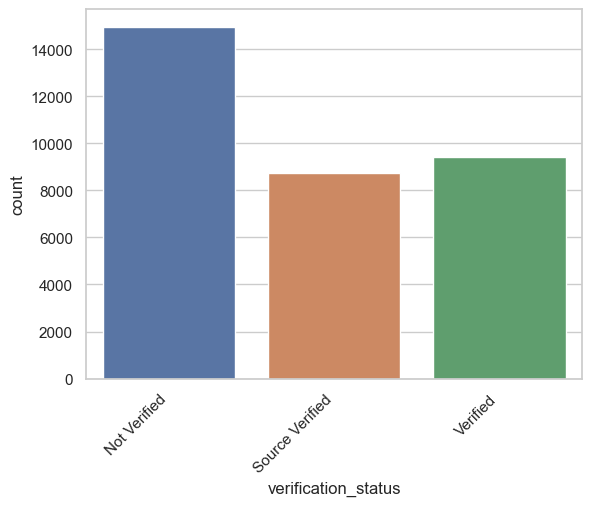

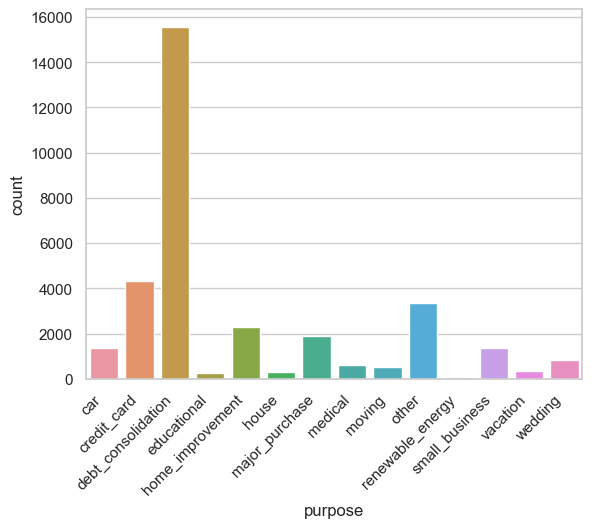

In [85]:
vc_column = ['grade','emp_length', 'home_ownership','verification_status','purpose']
for c in vc_column:
    sorted_order =df[c].value_counts().index.sort_values()
    ax = sns.countplot(data=df, x=c,  order=sorted_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

> The majority of customers fall into grades A, B, and C. They typically have more than 10 years of experience but do not own their homes outright; instead, their homes are either mortgaged or rented. Their source of income has not been verified, and their primary reason for applying for a loan is debt consolidation.

## plot with line 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33090 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               33090 non-null  int64  
 1   funded_amnt             33090 non-null  int64  
 2   term                    33090 non-null  int64  
 3   int_rate                33090 non-null  float64
 4   installment             33090 non-null  float64
 5   grade                   33090 non-null  object 
 6   emp_length              33090 non-null  float64
 7   home_ownership          33090 non-null  object 
 8   annual_inc              33090 non-null  float64
 9   verification_status     33090 non-null  object 
 10  loan_status             33090 non-null  object 
 11  purpose                 33090 non-null  object 
 12  zip_code                33090 non-null  object 
 13  dti                     33090 non-null  float64
 14  mths_since_last_delinq  33090 non-null

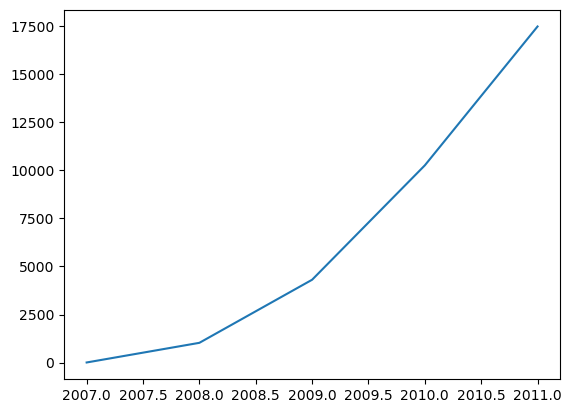

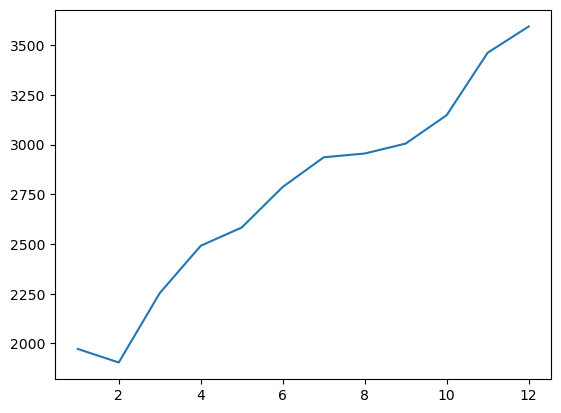

In [44]:
line_column = ['issue_y', 'issue_m']
for c in line_column:
    df[c].value_counts().sort_index().plot.line()
    plt.show()

> The number of customers has shown a upward trend over time.

In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33090 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               33090 non-null  int64  
 1   funded_amnt             33090 non-null  int64  
 2   term                    33090 non-null  int64  
 3   int_rate                33090 non-null  float64
 4   installment             33090 non-null  float64
 5   grade                   33090 non-null  object 
 6   emp_length              33090 non-null  float64
 7   home_ownership          33090 non-null  object 
 8   annual_inc              33090 non-null  float64
 9   verification_status     33090 non-null  object 
 10  loan_status             33090 non-null  object 
 11  purpose                 33090 non-null  object 
 12  zip_code                33090 non-null  object 
 13  dti                     33090 non-null  float64
 14  mths_since_last_delinq  33090 non-null

# Bivatiate Analysis
> Based on univariate analysis, I decided to transition into bivariate analysis, with a focus on the following features:

1. term - The number of payments on the loan.
2. grade - LC assigned loan grade
3. emp_length  - Employment length in years
4. home_ownership - The home ownership status
5. verification_status - Indicates if income was verified by LC
6. purpose
7. issue_m - The month which the loan was funded
8. issue_y - The year which the loan was funded
9. total_pymnt - total ayments received 
10. int_rate - the interest rate on the loan
11. installment - The monthly payment 

## prepare visulize functions

In [91]:
def boxplot(df,column):
    rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    sns.set(style="whitegrid")
    _, p = plt.subplots(1,3, figsize=(16, 4))
    ax = sns.countplot(x=column, order=df[column].value_counts().index.sort_values(), data=df,hue='loan_status',ax=p[2])
    bx = rw.plot.bar(x=column, y =['Fully Paid','Charged Off'],stacked=True,ax=p[1]  )
    cx  = rw.plot.bar(x=column, y ='charge_off_ratio',stacked=True,ax=p[0] )
    # Annotate the bars with count values
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))     
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    ax.set_xlabel('ratio per total for detail')
    bx.set_xlabel('ratio per total')
    cx.set_xlabel('charged_off_ratio from each value')
    plt.suptitle(f'The counts of Fully-Paid and Charged-Off customers by {column}')
    plt.tight_layout()
    # plt.title(f'The counts of Fully-Paid and Charged-Off customers by {column}')
   
    plt.show()
def lineplot(df, column, time = 'm'):
    if time != None:
        new_df = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
        sns.lineplot(data=new_df, x=column, y='Charged Off', color = 'r',label='Charged Off')
        sns.lineplot(data=new_df, x=column, y='Fully Paid', color = 'b',  label='Fully Paid')
        if time == 'm':
            plt.xlabel('Month')
        else:
            plt.xlabel('Year')
        plt.ylabel('Counts')
        plt.title('Loan Status Over Time')
        plt.show()
    else:
        new_df = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    
        plt.ylabel('Counts')
        plt.title('Loan Status Over Time')
        plt.show()

## The number of fully paid and charged-off customers over time

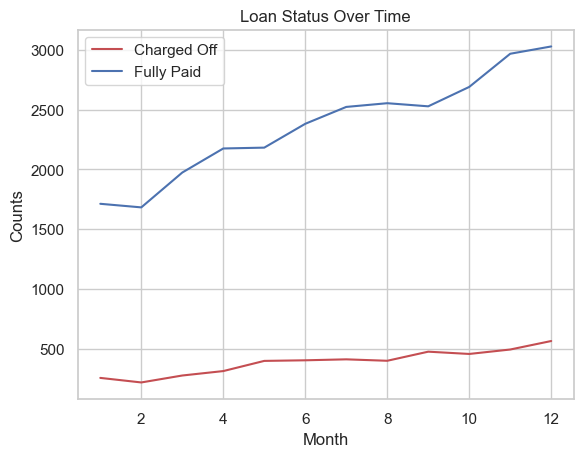

In [81]:
# line track trend charged of by month 
lineplot(df, 'issue_m')

> We have a slight lull in activity during the months of May and September. During this time, we observe an unusual occurrence where the number of fully-paid customers decreases while the number of charged-off customers increases.

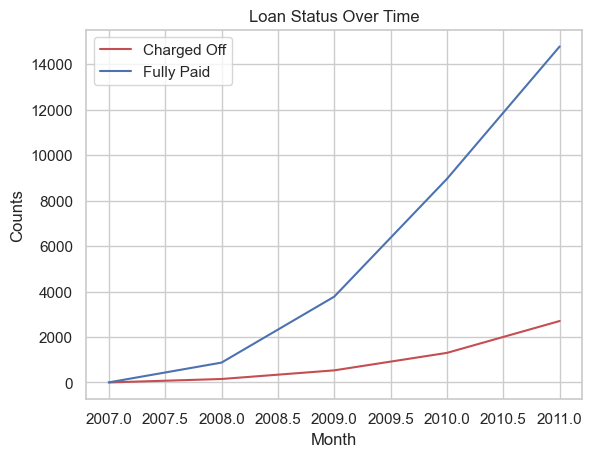

In [83]:
# line track trend charged of by year 
lineplot(df, 'issue_y')

>Over time, the customer count is on the rise, indicating an increase in both fully paid and charged-off customers. However, the rate of increase in fully paid customers is notably faster.


## The number of fully paid and charged-off customers by:
1. term
2. grade
3. emp_length
4. home_ownership
5. verification_status
6. purpose

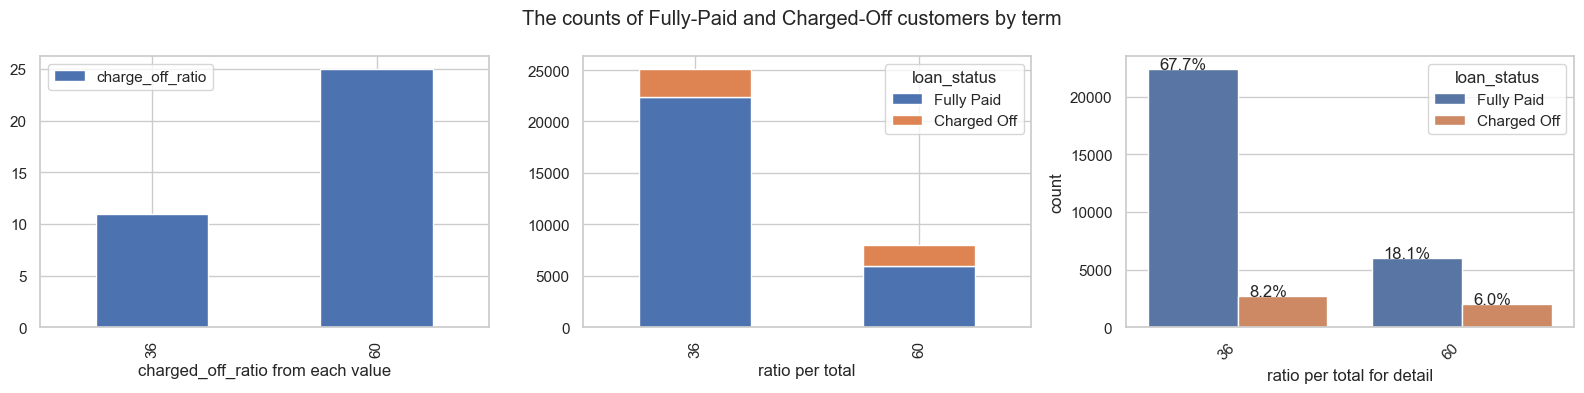

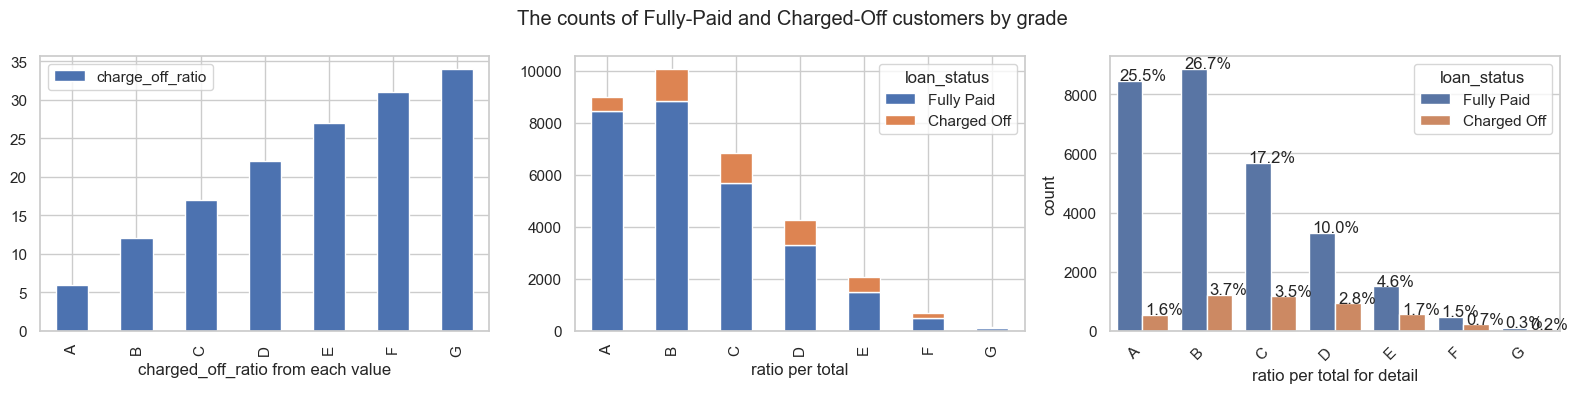

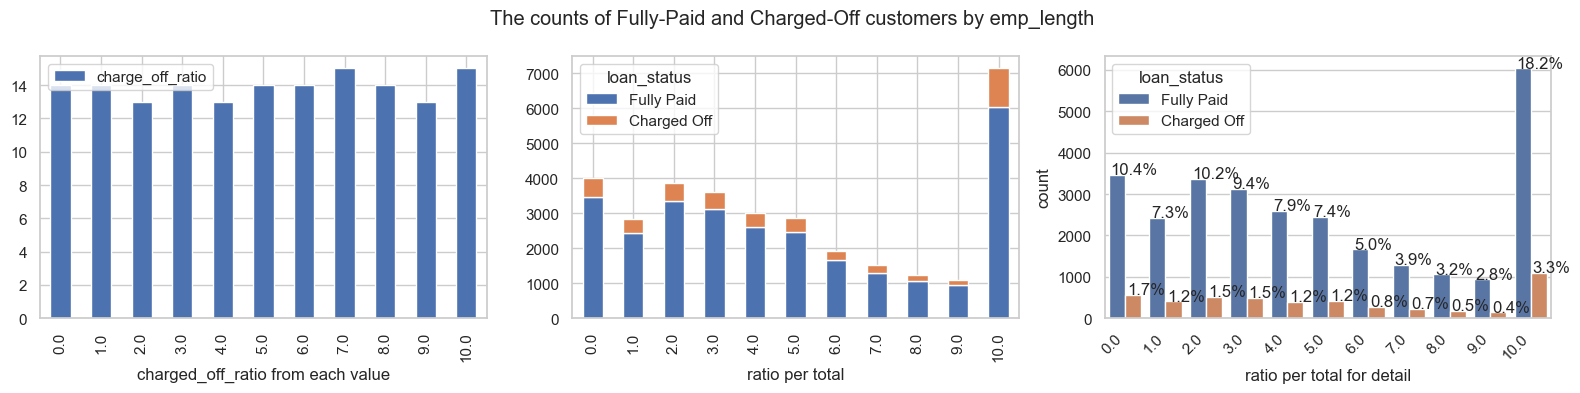

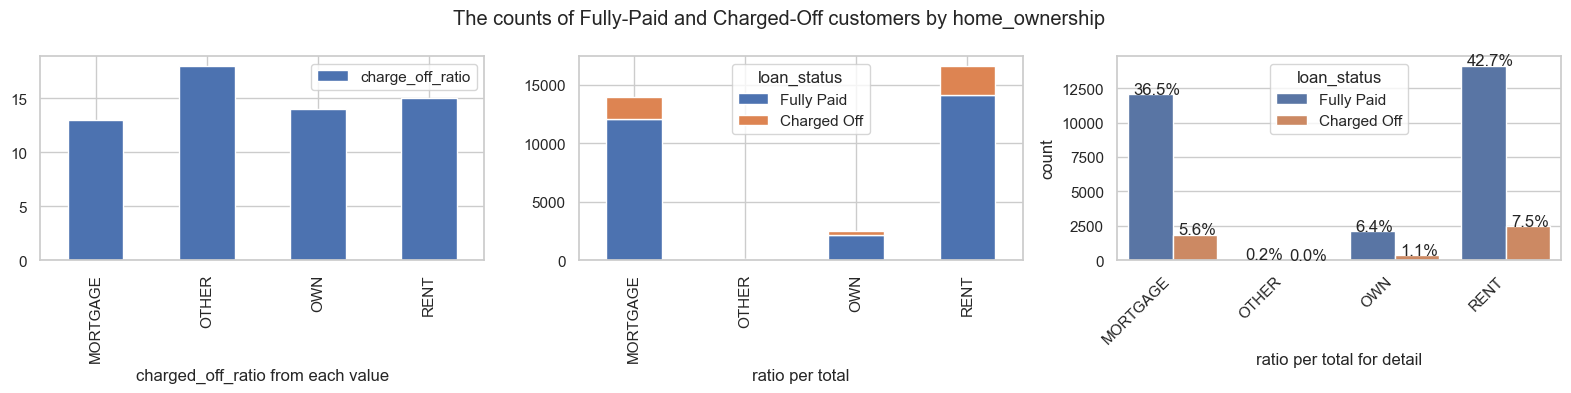

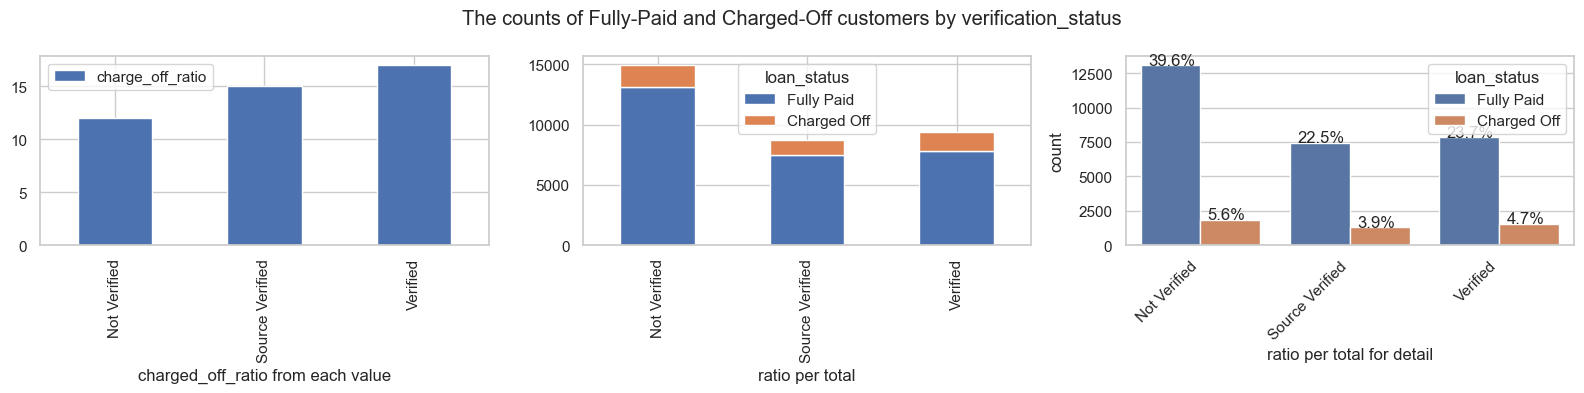

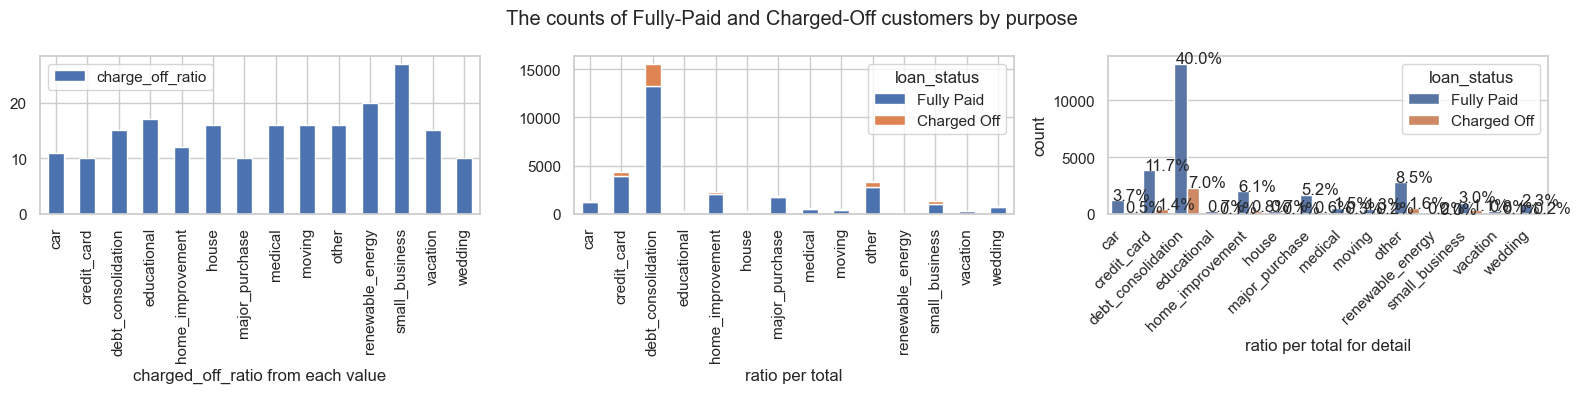

In [93]:
# emp_length is not a useful separable feature as there are all the lengths for each status
countplot_coulumns = ['term','grade','emp_length','home_ownership','verification_status', 'purpose']
for c in countplot_coulumns:
    boxplot(df,c)

> Here are the conclusions:
>> 1. The majority of customers have short-term loans, but long-term loans have a higher ratio of charged-off customers.
>> 2. The ratio of charged-off customers increases as Lending Club assigns a lower loan grade.

## em_length  analysis

In [129]:
def ana2(df, column):
    # columns has 2 values, ex: ['emp_length','installment']
    
    rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    new_df = rw.groupby(column[0]).agg({column[1]: 'mean', 'Charged Off': 'sum'}).reset_index()

    x1 = new_df[column[0]]
    x2 = new_df[column[1]]
    charged_off_sum = new_df['Charged Off']
    width = 0.35  # Width of the bars
    _, ax = plt.subplots(1,2, figsize=(16, 4))
    bar1 = ax[0].plot(np.arange(len(x1)), x2, label=f'Mean {column[1]}')
    # Create bars for 'Charged Off' sum, shift them to the right
    bar2 = ax[1].bar(np.arange(len(x1)) + width, charged_off_sum, width, label='Charged Off Sum', align='center')

    ax[0].set_xlabel('Employment Length')
    ax[0].set_ylabel('Count')
    ax[1].set_xlabel('Employment Length')
    ax[1].set_ylabel('Count')
    # ax.set_title('Mean Installment and Charged Off Sum by Employment Length')
    ax[0].set_xticks(np.arange(len(x1)))
    ax[0].set_xticklabels(x1)
    ax[0].legend()
    ax[1].legend()
    # Annotate the 'installment' values
    for i, value in enumerate(x2):
        ax[0].text(i, value, f'{value:.2f}', ha='center', va='bottom')
    # Annotate the 'Charged Off' values
    # for i, value in enumerate(charged_off_sum):
    #     ax.text(i + width, value, str(value), ha='center', va='bottom')
    plt.show()


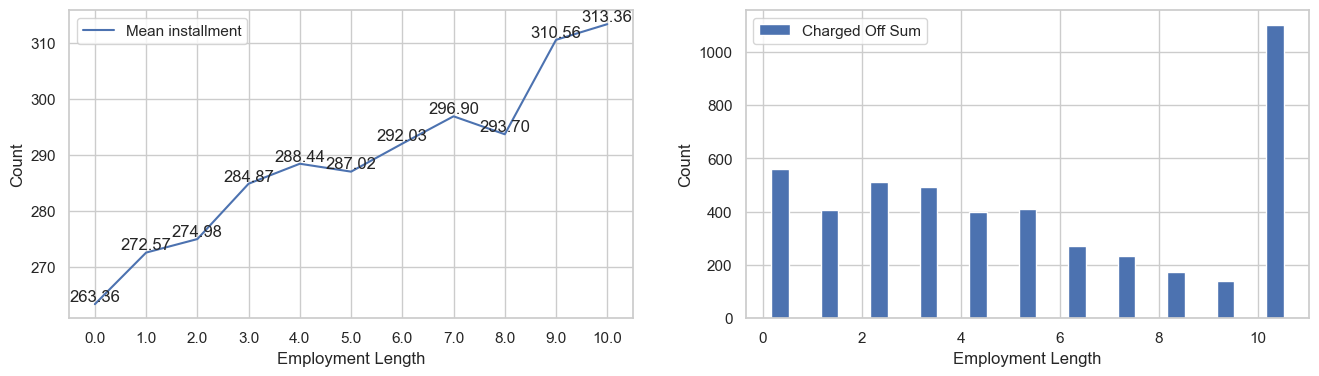

In [130]:
ana2(df, ['emp_length','installment'])

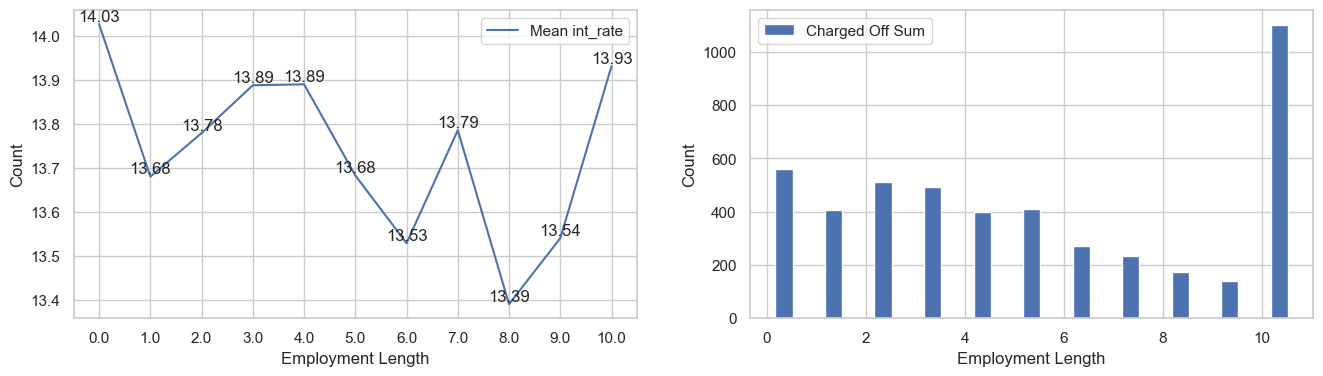

In [131]:
ana2(df, ['emp_length','int_rate'])

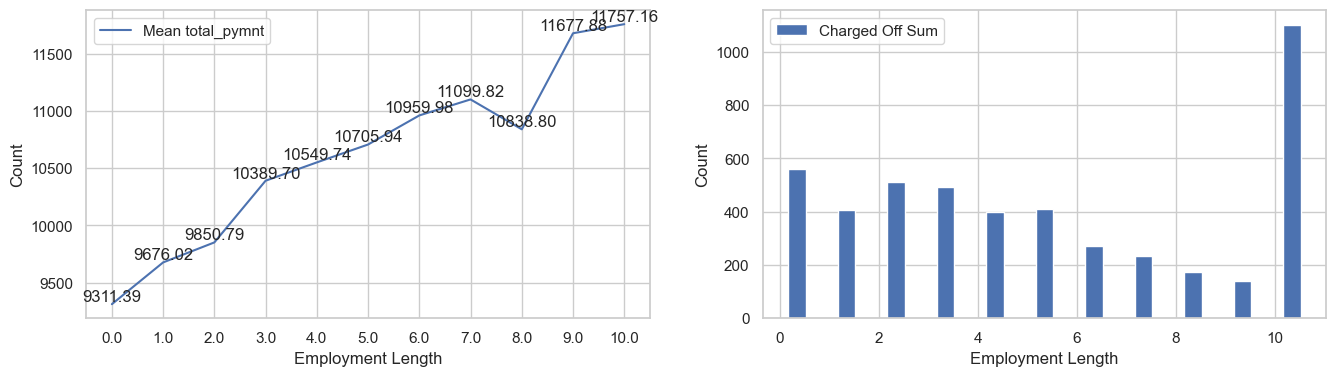

In [132]:
ana2(df, ['emp_length','total_pymnt'])

> Despite the monthly payments and total payments showing an increasing trend, the customer charges are trending downward. Because they have solid financial resources. The employment length of ten years or more may be considered an outlier, possibly due to a significant number of customers with over a decade of employment.

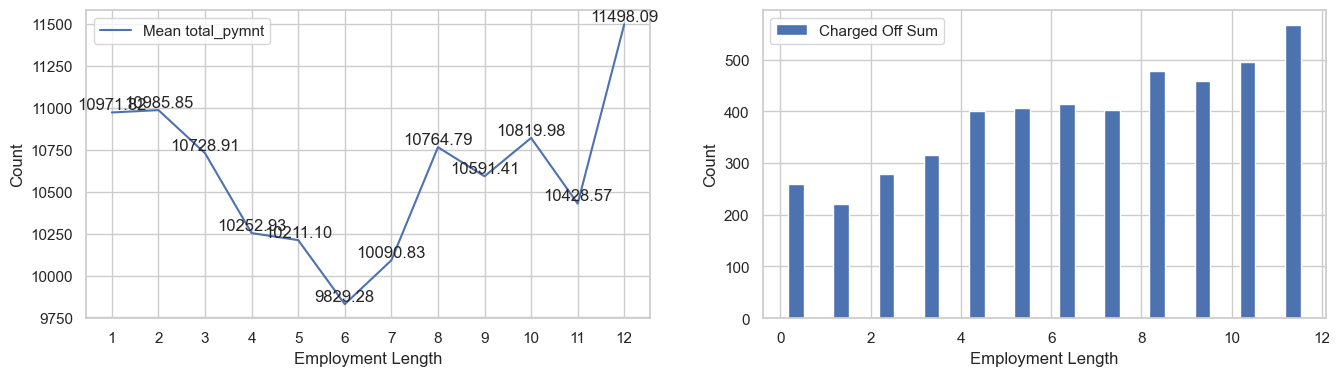

In [135]:
ana2(df, ['issue_m','total_pymnt'])

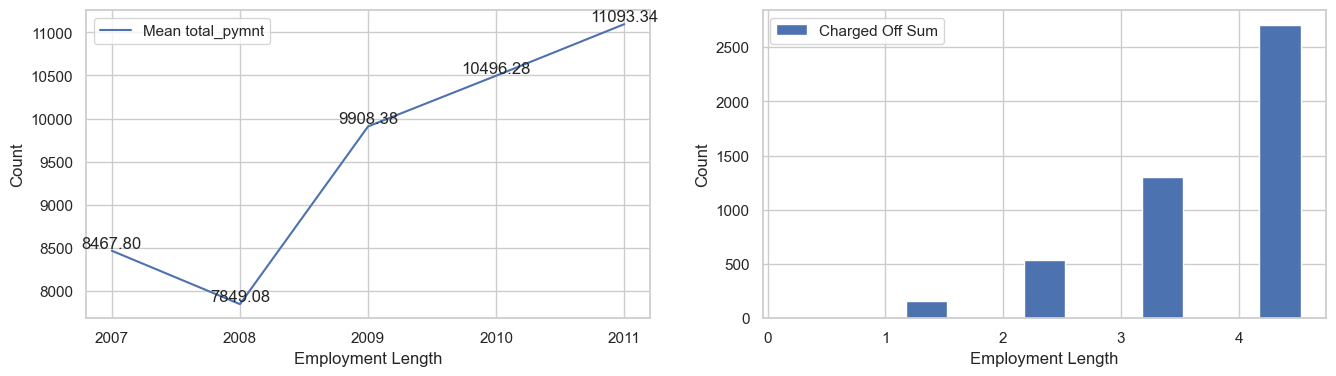

In [136]:
ana2(df, ['issue_y','total_pymnt'])

# Time analysis

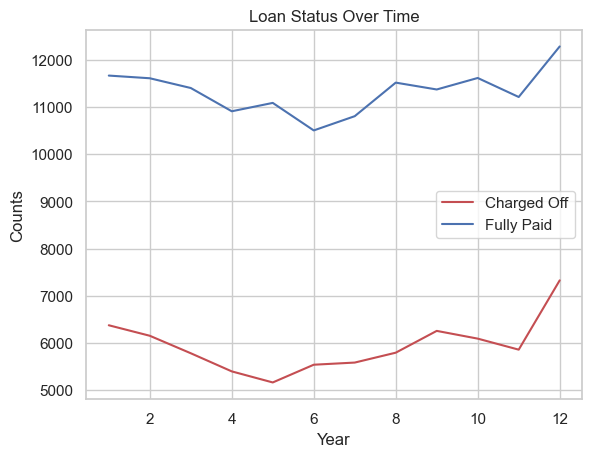

In [145]:
column =['issue_y','total_pymnt']
rw = df.pivot_table(index='issue_m', columns='loan_status', values='total_pymnt', aggfunc='mean').reset_index()
sns.lineplot(data=rw, x='issue_m', y='Charged Off', color = 'r',label='Charged Off')
sns.lineplot(data=rw, x='issue_m', y='Fully Paid', color = 'b',  label='Fully Paid')
plt.xlabel('Year')
plt.ylabel('avg')
plt.title('Loan Status Over Time')
plt.show()